## Actividad Final Introducción al Python

### 1. Introducción

Este trabajo tiene como objetivo realizar un análisis exploratorio de un dataset relacionado con ventas de videojuegos a nivel mundial con ventas superiores a 100.000 copias. 

El dataset se puede consultar aquí: https://www.kaggle.com/datasets/gregorut/videogamesales/data

Se analizarán tendencias, relaciones entre variables y posibles patrones, usando técnicas estadísticas y visualización avanzada.

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

### 2. Carga de datos

In [3]:
# Cargar datos
df = pd.read_csv('vgsales.csv')

# Imprimios la cantidad de filas y columnas
print(f'Tamaño inicial del dataset (Filas, Columnas): {df.shape}')

# Inspección inicial
display(df.head())

Tamaño inicial del dataset (Filas, Columnas): (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 3. Preprocesamiento de datos

#### Analizando los tipos de datos, vemos que el año viene en tipo float, así que lo convertimos a int.

In [4]:
display(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df["Year"] =  df["Year"].astype("Int64")

display(df.dtypes)

Rank              int64
Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Proseguimos con el preprocesamiento de datos. Procesamos duplicados y NaN

In [6]:
# Los duplicados no nos sirven así que los eliminamos
if(df.duplicated().sum() > 0):
    df.drop_duplicates(inplace=True)
    # Imprimimos la cantidad de filas y columnas tras eliminación de duplicados
    print(f'Tamaño del dataset tras eliminar duplicados (Filas, Columnas): {df.shape}')
else:
    print('No hay duplicados')


# Respecto a los NaN, solos los aceptaremos en las columnas de sales por región, reemplazándolos por 0
if df['EU_Sales'].hasnans or df['JP_Sales'].hasnans or df['NA_Sales'].hasnans or df['Other_Sales'].hasnans:
    df['EU_Sales'].fillna(0, inplace=True)
    df['JP_Sales'].fillna(0, inplace=True)
    df['NA_Sales'].fillna(0, inplace=True)
    df['Other_Sales'].fillna(0, inplace=True)

# En cualquier otra columna los eliminamos
df.dropna(inplace=True)

# Imprimimos la cantidad de filas y columnas tras eliminación de NaN
print(f'Tamaño del dataset tras eliminar NaN (Filas, Columnas): {df.shape}')

# Checkeamos que no quedan nulls
df.isnull().sum()

No hay duplicados
Tamaño del dataset tras eliminar NaN (Filas, Columnas): (16291, 11)


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Con esto damos por finalizado el preprocesamiento. 

### 4. Análisis descriptivo

Realicemos un análisis descriptivo básico de las ventas globales de videojuegos

#### Top 10 juegos más vendidos de la historia

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


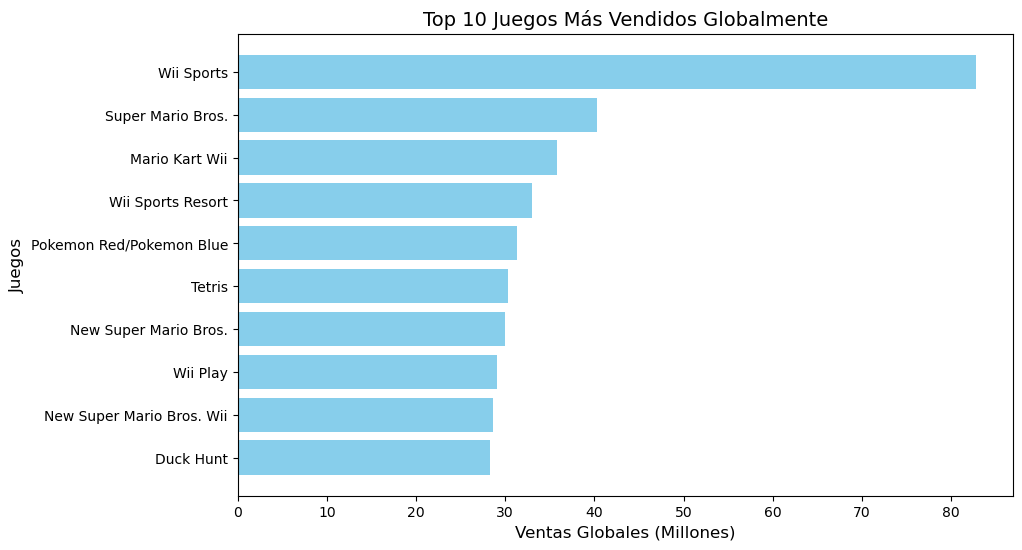

In [7]:
top_10_games = top_games_global = df.nlargest(10, 'Global_Sales')[['Name', 'Global_Sales']]

display(top_10_games)

plt.figure(figsize=(10, 6))
plt.barh(top_games_global['Name'], top_games_global['Global_Sales'], color='skyblue')
plt.title('Top 10 Juegos Más Vendidos Globalmente', fontsize=14)
plt.xlabel('Ventas Globales (Millones)', fontsize=12)
plt.ylabel('Juegos', fontsize=12)
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el más vendido arriba
plt.show()



#### Género más popular

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

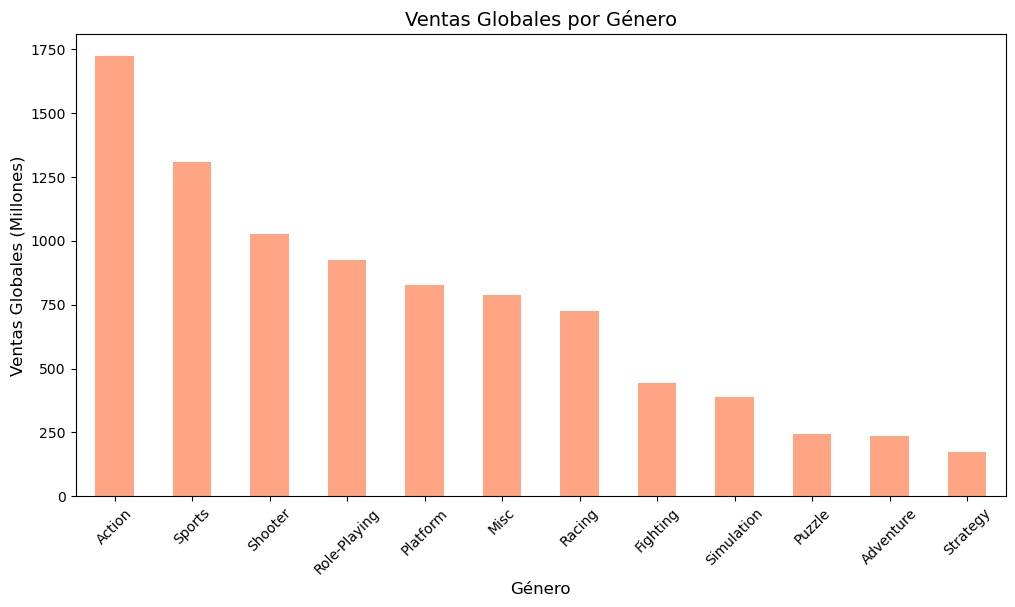

In [8]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

display(genre_sales)

plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='coral', alpha=0.7)
plt.title('Ventas Globales por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (Millones)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


#### Plataformas con más ventas globales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

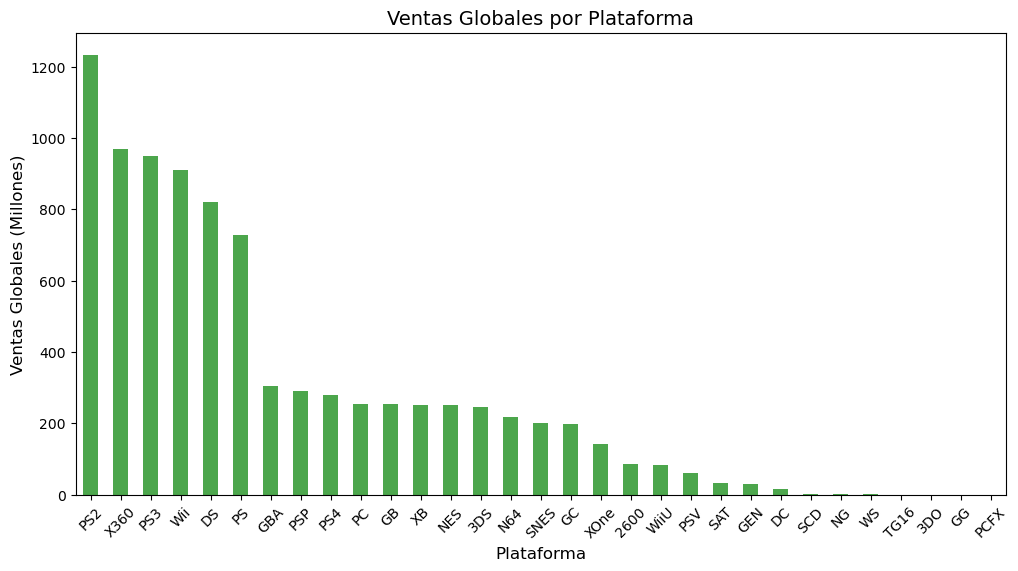

In [9]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

display(platform_sales)

plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar', color='green', alpha=0.7)
plt.title('Ventas Globales por Plataforma', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (Millones)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 5. Análisis de distribución

Veamos ahora un análisis de la distribución de las ventas globales y procedamos a identificar outliers si los hubiera

#### Análisis de distribución de ventas por región

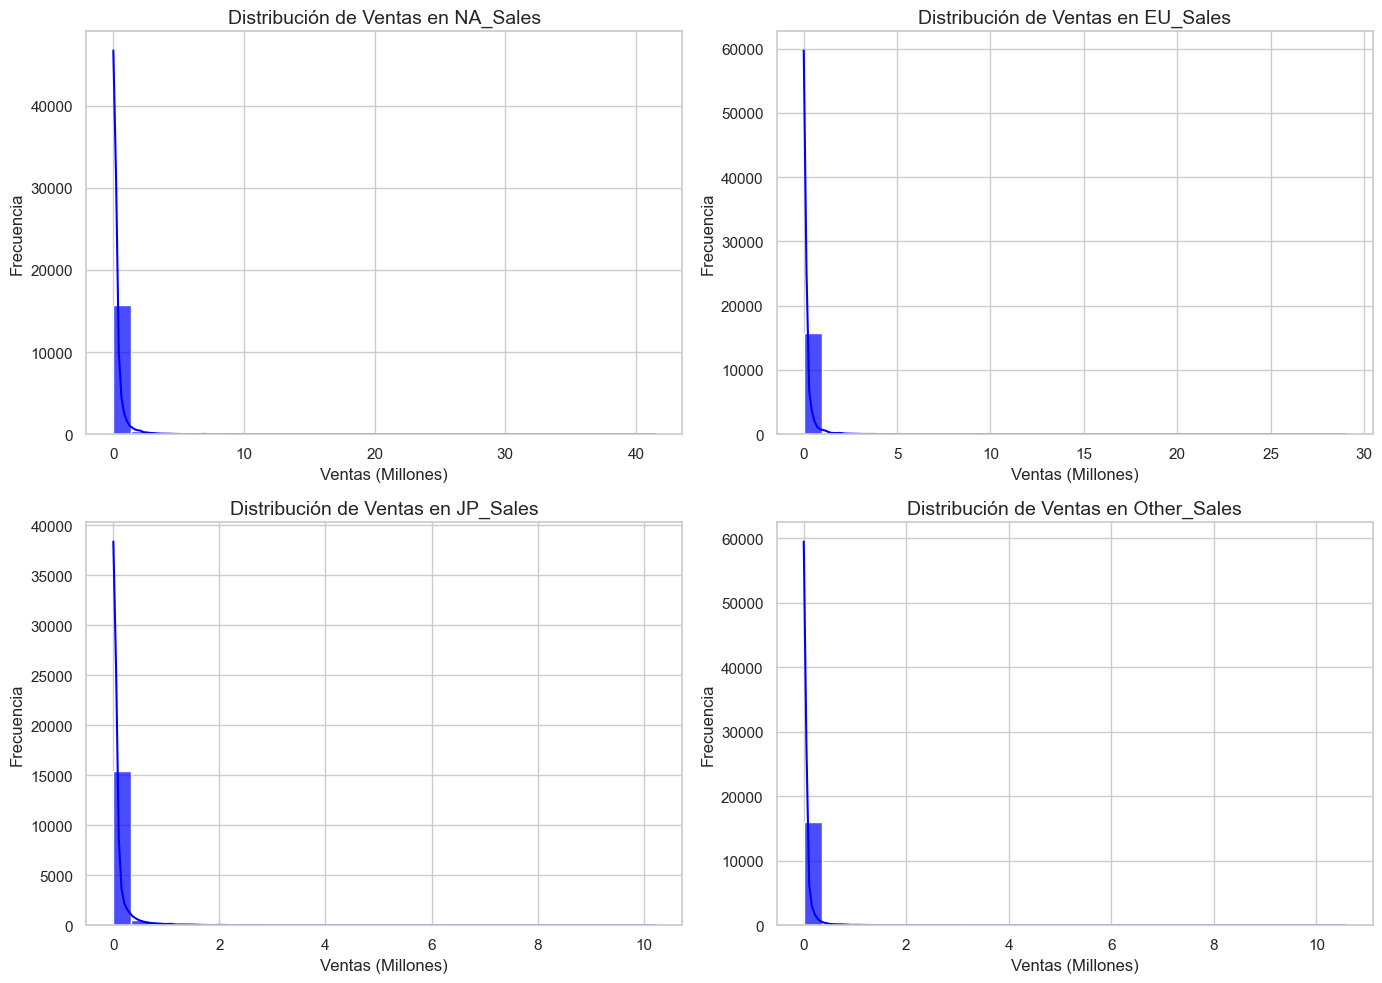

In [10]:
# Configuración de estilo
sns.set_theme(style="whitegrid")

# Creamos subplots para las distribuciones de ventas por región
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Cuadrícula 2x2

# Creamos gráfica por cada región 
for i, region in enumerate(regions):
    ax = axes[i // 2, i % 2]  # Posición del subplot
    sns.histplot(df[region], kde=True, bins=30, ax=ax, color='blue', alpha=0.7)
    ax.set_title(f'Distribución de Ventas en {region}', fontsize=14)
    ax.set_xlabel('Ventas (Millones)', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustamos espacios entre subplots
plt.tight_layout()
plt.show()

#### Detección de outliers con Boxplot

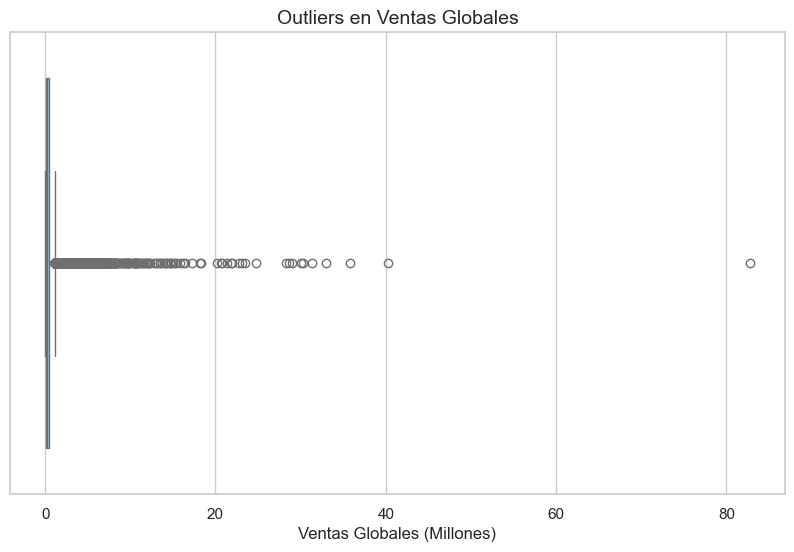

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Global_Sales'], color='skyblue')
plt.title('Outliers en Ventas Globales', fontsize=14)
plt.xlabel('Ventas Globales (Millones)', fontsize=12)
plt.show()

#### Conclusiones

Vemos que hay un claro outlier con más del doble de ventas que el segundo (WiiSports). También vemos que las ventas están muy concentradas en la parte baja del histograma, con gran cantidad de juegos con ventas cercanas (relativamente) a cero, lo cuál hace su visualización difícil.

Redibujemos las gráficas sólo con los juegos con menos de 50 millones de ventas globales y más de 1 millón. 
Usaremos la técnica de la transformación logarítmica para mejorar la visualización. 
También ajustaremos los bins para agrupar mejor los datos.

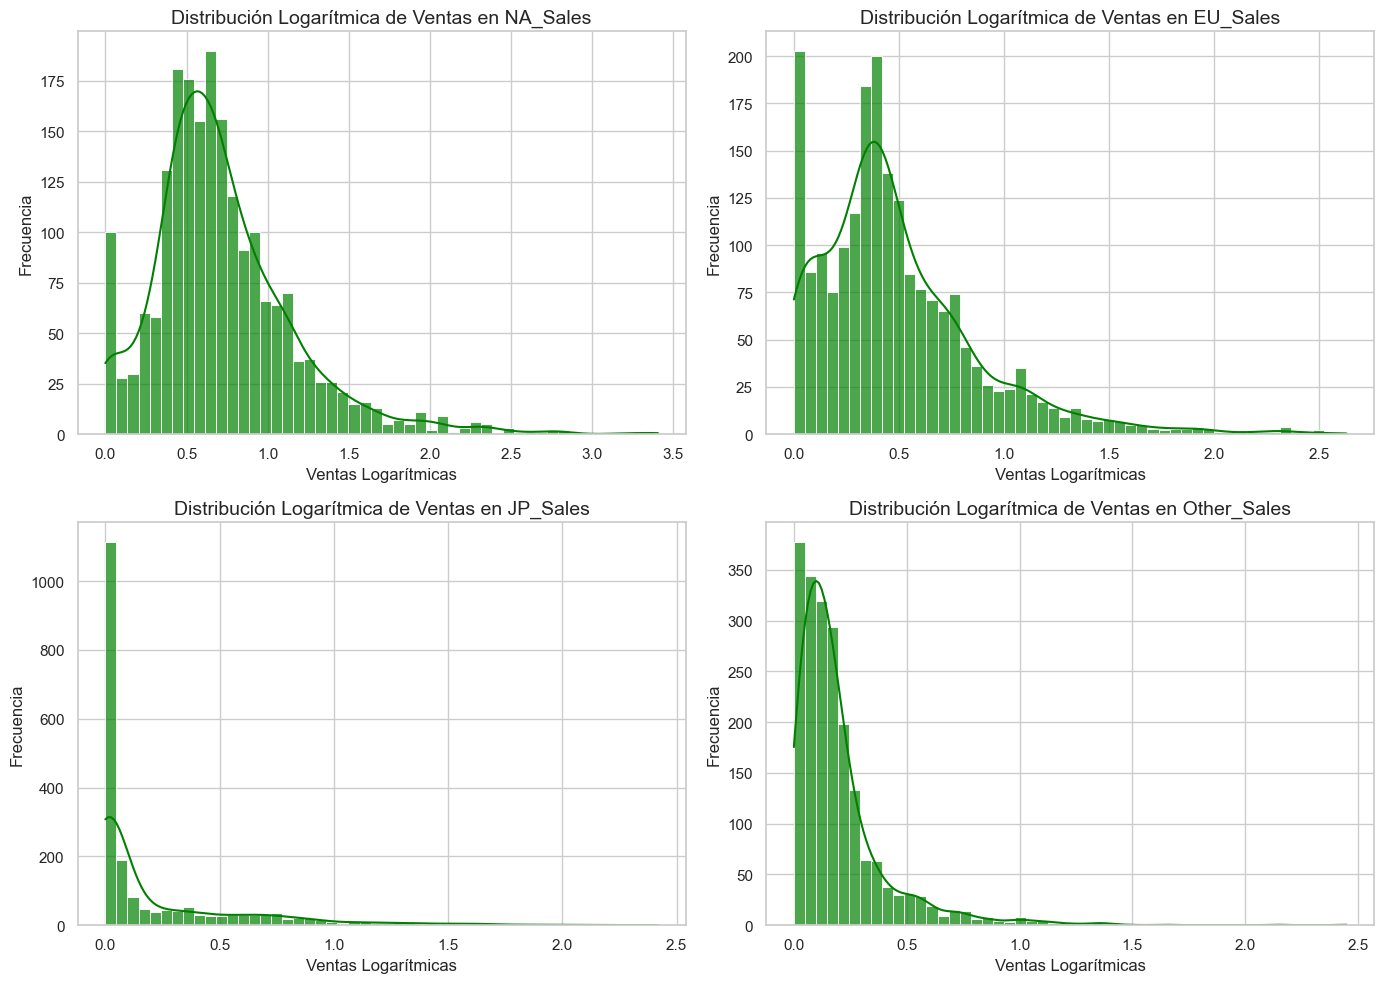

In [12]:
# Creamos copia del dataset original eliminando outliers (juegos con Gloabl_Sales entre 1 y 50 millones)
df_no_outliers = df[(df['Global_Sales'] > 1) & (df['Global_Sales'] < 50)].copy()

# Aplicamos la transformación logarítmica (agregando un pequeño valor para evitar log(0))
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for region in regions:
    df_no_outliers[region] = np.log1p(df[region])  # log1p(x) = log(1 + x)

# Creamos subplots para las distribuciones transformadas por región
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, region in enumerate(regions):
    ax = axes[i // 2, i % 2]
    sns.histplot(df_no_outliers[region], kde=True, bins=50, ax=ax, color='green', alpha=0.7)
    ax.set_title(f'Distribución Logarítmica de Ventas en {region}', fontsize=14)
    ax.set_xlabel('Ventas Logarítmicas', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)

# Ajustamos espacios entre subplots
plt.tight_layout()
plt.show()

### 6. Análisis de correlación

Exploremos ahora la correlación entre las ventas en las distintas regiones y las ventas globales.
Veamos también si las plataformas están relacionadas con las mayores ventas.

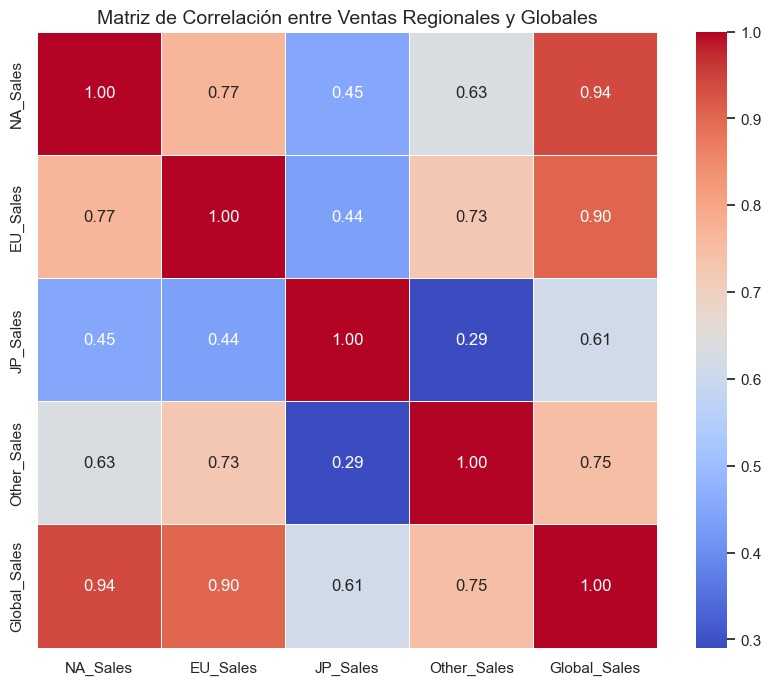

In [13]:
# Matriz de Correlación entre ventas regionales y globales
correlation_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Ventas Regionales y Globales', fontsize=14)
plt.show()

#### Análisis de la Matriz de Correlación

Vemos que hay correlación fuerte entre las ventas Globales y las ventas en NA y Europa, lo cuál indica un el fuerte impacto que estos mercados tienen en la venta global de juegos. 

En cuanto al mercado Japones (y en menor medida el resto del mundo (Other_Sales)), la gráfica sugiere una independencia entre ese mercado y los demás, lo cuál implica que el público japones no comparte los mismos gustos que el público americano o europeo. 

Dibujemos ahora un **Pairplot** para ver las relaciones entre cada par de variables y así poder aumentar nuestro entendemiento de este grupo de datos.

<Figure size 1000x600 with 0 Axes>

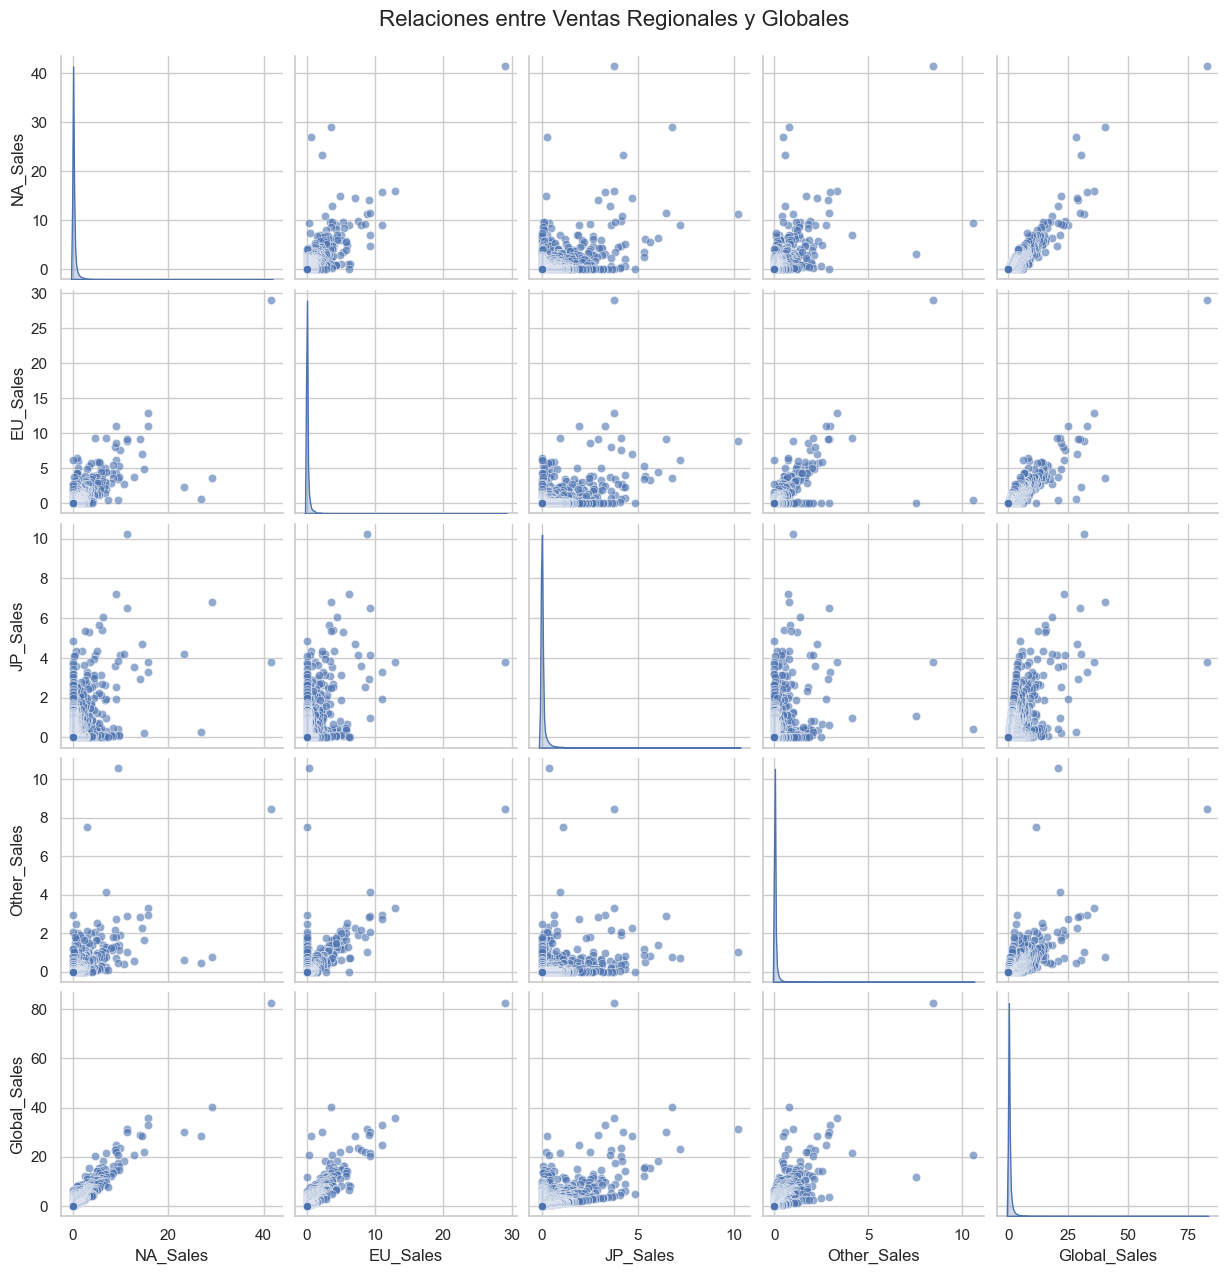

In [14]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df, vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Relaciones entre Ventas Regionales y Globales', y=1.02, fontsize=16)
plt.show()

#### Análisis del Pairplot

En los scatter plots entre NA y Europa vemos que la nube de puntos forma una línea diagonal ascendente, lo cual indica que las ventas entre ambos mercados suelen aumentar juntas. Esto no es sorprendente y está en linea con lo que vimos en el apartado anterior.

También vemos que las ventas globales tienen un impacto positivo en todas las regiones, lo cuál indica que los juegos con buenas ventas globales suelen vender también bien en todos los mercados.

Observamos también que en los gráficos del mercado japonés hay poca densidad en la parte alta. Esto indica que las ventas de juegos en ese mercado son por lo general bajas en comparación a otros mercados, a excepción de unos pocos juegos, los cuales están representados por los outliers en las gráficas. Las gráficas de otros mercados (Other_Sales) muestran tendencias similares a las del mercado japonés.

Por último, hablando de outliers, vemos varios puntos dispersos lejos de la concentración principal, especialmente en las gráficas de ventas globales. Esto representa juegos con un éxito de ventas excepcionalmente alto, los cuales dominan con claridad las ventas totales.

### 7. Análisis temporal

Estudiaremos aquí la evolución de las ventas a lo largo de los años.

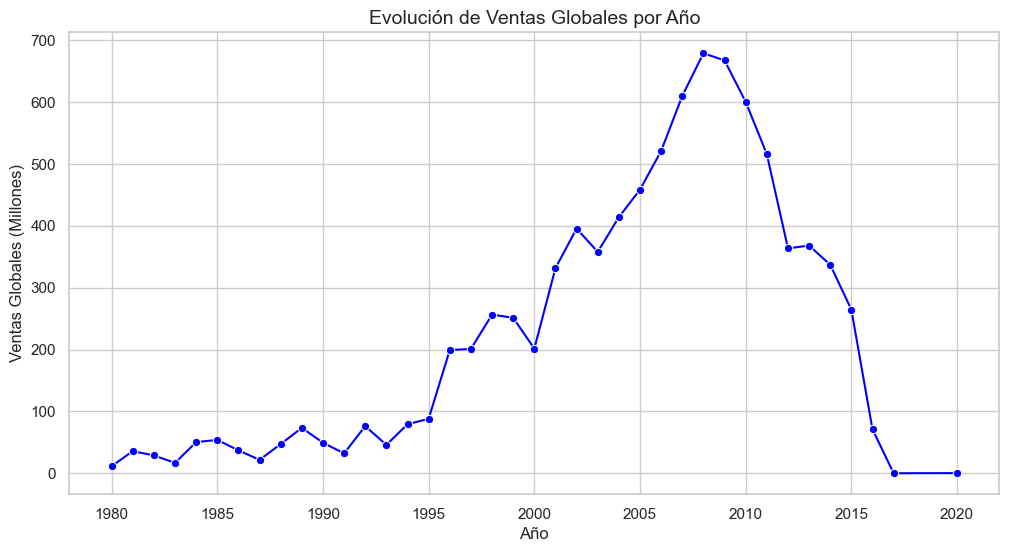

In [15]:
# Ventas globales por año
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Gráfico de línea: Ventas totales por año
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=sales_by_year, marker='o', color='blue')
plt.title('Evolución de Ventas Globales por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Globales (Millones)', fontsize=12)
plt.grid(True)
plt.show()

#### Análisis de la gráfica temporal

Vemos una gran explosión de ventas de videojuego a partir de mediados de los noventa, pero en particular a partir del año 2000, con un crecimiento exponencial hasta finales de la primera década del siglo XXI. La irrupción de Sony y Microsoft en el mercado hasta entonces dominado por Nintendo tuvo mucho que ver, sobre todo con el lanzamiento de la PS2 que es la consola más vendida de la historia, y la XBOX360 que es la segunda, como vimos anteriormente.

Se aprecia también una caída importante en las ventas a partir del año 2010, que puede tener como causa la gran crisis económica mundial. Más alla del 2015, habría que mirar si los datos del dataset están incompletos porque la tendencia sigue a la baja, lo cual no concuerda mucho con las noticias.

Veamos ahora el Análisis de Varianza (ANOVA)

In [16]:
# Comparar ventas entre regiones: NA, EU, JP
na_sales = df['NA_Sales']
eu_sales = df['EU_Sales']
jp_sales = df['JP_Sales']

# Test ANOVA
anova_result = f_oneway(na_sales, eu_sales, jp_sales)

# Resultados del ANOVA
print("ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

ANOVA Results:
F-statistic: 422.24
P-value: 0.0000


#### Análisis del test ANOVA

Vemos el que el valor del F-statistic es muy alto y el valor de P-value ex extremadamente bajo. Esto indica una gran diferencia entre los mercados de EU, NA y JP, lo cuál concuerda con nuestros hallazgos anteriores ya que vemos que los hábitos de consumo entre mercados son muy distintos, en particular entre JP y el resto. También los tipos de videojuegos más populares varían mucho de una región a otra. 

Posiblemente podamos hablar de distintas estrategias de marketing en dichos mercados, ya que las diferencias culturales son grandes, lo cual hace que el público mayoritario para el que se hace un juego infiera las regiones en las que venderá mejor.

### 8. Conclusiones finales

En el análisis realizado sobre las ventas de videojuegos en distintas regiones, hemos explorado las ventas globales de videojuegos en el mundo desde los años 80 hasta la actualidad, mostrando el Top 10 en ventas, así como el género y la plataforma más populares. 

También hemos analizado dos aspectos clave: la evolución temporal de las ventas y la diferencia en ventas entre regiones:

El análisis de las ventas globales a lo largo del tiempo revela patrones claros de crecimiento y declive en las ventas. Vemos que en la década de los 90 se establece la industria del videojuego claramente, para luego explotar en la década siguiente con la irrupción de Sony y Microsoft, y la continuación de Nintendo como baluarte del entretenimiento electrónico. En torno a 2010 se produce un punto de inflexión, con una caida pronunciada en venta, probablemente propiciada por la gran crisis económica mundial.

Respecto a las diferencias entre mercados, los análisis de correlación y el test ANOVA revelaron que existen diferencias significativas entre las ventas en las regiones de Norteamérica (NA), Europa (EU) y Japón (JP). El test ANOVA, con un F-statistic de 422.24 y un p-value de 0.0000, sugiere que las ventas no son homogéneas entre las regiones, lo que podría reflejar diferentes gustos, comportamientos de compra o éxito de los juegos en estas regiones.
Las diferencias encontradas subrayan la necesidad de estrategias de marketing específicas y adaptadas a cada región, ya que los juegos populares en una región no necesariamente tienen el mismo nivel de éxito en otra.

### 9. Limitaciones del análisis

La calidad de los datos es un factor crítico. Aunque el dataset utilizado proporciona información valiosa, puede haber registros faltantes o imprecisos (como ventas en ciertas regiones) que afectan la exactitud de los resultados. Los valores nulos o los outliers podrían distorsionar el análisis, por lo que es esencial aplicar técnicas de limpieza de datos y validación antes de los análisis.

Además, el análisis no toma en cuenta otros factores que podrían influir en las ventas, como la competencia en el mercado, los cambios en los precios o los avances tecnológicos. Además, no se ha considerado el impacto de la crisis económica mundial del 2008 o la pandemia de COVID-19, que pudieron haber alterado los patrones de compra de los consumidores.

### 10. Aplicaciones del análisis

Las diferencias en las ventas entre regiones indican la necesidad de estrategias de marketing localizadas. Por ejemplo, si un videojuego tiene ventas significativamente más altas en Norteamérica, se deben explorar las razones detrás de este éxito para replicarlas en otras regiones.

Los desarrolladores pueden usar estos hallazgos para adaptar sus juegos a las preferencias de los consumidores en diferentes regiones, mejorando las posibilidades de éxito en el mercado global.

En resumen, el análisis de las ventas de videojuegos revela patrones clave y diferencias regionales significativas, lo que puede ayudar tanto a las compañías de videojuegos como a los analistas del mercado a optimizar sus estrategias en función de la evolución de las ventas y las preferencias locales de los consumidores.

### 11. Referencias

**Dataset de Ventas de Videojuegos:**
- El dataset utilizado para este análisis proviene de la plataforma Kaggle. Esta base de datos contiene información sobre las ventas de videojuegos a nivel global, con más de 100,000 copias vendidas. 
https://www.kaggle.com/datasets/gregorut/videogamesales/data

**Documentación académica y artículos**
- Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: principles and practice (2nd ed.). 
https://otexts.com/fpp3/
- Bickel, P. J., & Doksum, K. A. (2001). Mathematical Statistics: Basic Ideas and Selected Topics. Volumen 1. Prentice Hall.
- APA (7ª edición): Kanagavell, M. H. (2020, June 2). T-statistic, F-statistic, and p-value. Medium. 
https://medium.com/@maheshhkanagavell/t-statistic-f-statistic-and-p-value-697261625d31#:~:text=In%20the%20context%20of%20ANOVA,in%20means%20are%20statistically%20significant.